In [1]:
# to instll scikit for image procesing 
conda install -c conda-forge scikit-image

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops

In [52]:
import os
path=os.getcwd()
print(path)

/home/shekh/Desktop/MachineLeaning/signature-extracter


In [64]:
# read the input image
img = cv2.imread('/home/shekh/Desktop/MachineLeaning/signature-extracter/input/in2.png', 0)


In [65]:
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   1   1]
 [255 255 255 ... 141 141 141]
 [255 255 255 ... 255 255 255]]


In [66]:
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

In [67]:
print("first image is {} and second image is {}".format(img,img))

first image is [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] and second image is [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [68]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)


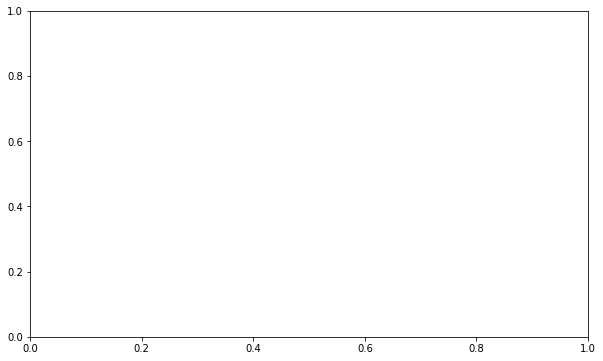

In [69]:
image_label_overlay = label2rgb(blobs_labels, image=img)

fig, ax = plt.subplots(figsize=(10, 6))

In [70]:
# plot the connected components (for debugging)
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

In [71]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

# experimental-based ratio calculation, modify it for your cases
# a4_constant is used as a threshold value to remove connected pixels
# are smaller than a4_constant for A4 size scanned documents
a4_constant = ((average/84.0)*250.0)+100
print("a4_constant: " + str(a4_constant))

# remove the connected pixels are smaller than a4_constant
b = morphology.remove_small_objects(blobs_labels, a4_constant)
# save the the pre-version which is the image is labelled with colors
# as considering connected components
plt.imsave('pre_version.png', b)

# read the pre-version
img = cv2.imread('pre_version.png', 0)
# ensure binary
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save the the result
cv2.imwrite("/home/shekh/Desktop/MachineLeaning/signature-extracter/output/output.jpeg", img)

the_biggest_component: 1644
average: 37.65489404641776
a4_constant: 212.06813704291


True